<h1>Tree of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1">INTRODUCTION</a></span></li><li><span><a href="#DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH." data-toc-modified-id="DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH.-2">DEDUCTIONS FROM THE PREVIOUS RESEARCH.</a></span></li><li><span><a href="#ASSUMPTIONS" data-toc-modified-id="ASSUMPTIONS-3">ASSUMPTIONS</a></span></li><li><span><a href="#TACKLING-ASSUMPTIONS" data-toc-modified-id="TACKLING-ASSUMPTIONS-4">TACKLING ASSUMPTIONS</a></span><ul class="toc-item"><li><span><a href="#Investigating-Relationships-between-features" data-toc-modified-id="Investigating-Relationships-between-features-4.1">Investigating Relationships between features</a></span></li><li><span><a href="#Checking-Collinearity" data-toc-modified-id="Checking-Collinearity-4.2">Checking Collinearity</a></span></li><li><span><a href="#Checking-for-Class-Imbalance" data-toc-modified-id="Checking-for-Class-Imbalance-4.3">Checking for Class Imbalance</a></span></li><li><span><a href="#Checking-for-Outliers" data-toc-modified-id="Checking-for-Outliers-4.4">Checking for Outliers</a></span></li></ul></li></ul></div>

## INTRODUCTION
In my previous research, I trained a **Logistic Regression** model with data that I hadn't extensively preprocessed. I did not follow any of the assumptions with regards to using Logistic Regression, and I was able to achieve an accuracy of about 80%. In this notebook however I will follow the assumptions, and observe how my model performs.

## DEDUCTIONS FROM THE PREVIOUS RESEARCH.
- With k-fold cross validation, I only achieved an accuracy of 80% on the test set.
- With the learning curve, I was able to tell that adding more training samples won't do any good.
- With the learning curve, I was also able to tell that the model totally "underfits" the data.
- With the validation curve, I was also able to tell that our model didn't do too well with variations in regularization strength.
- We noticed that there was large imbalance in our classes with about an 80:20 ratio.
- With the confusion matrix, I was able to tell the number of misclassified samples.

## ASSUMPTIONS

- Logisitic regression does not **require a linear relationship** between the dependent and independent variable.
- **Homoscedasticity** is not required unlike in linear regression.
- The dependent variable is **not** measured on an interval.
- Observations must be **independent** of each other, in other words, observations should not come from repeated measurements or matched data.
- Logistic regression assumes **linearity of independent variables and log odds**.
- The dependent variable should be **dichotomous** in nature.
- It works well when there are **no outliers** in your data.
- It also works well when there is **no multicollinearity** in our predictors. 
- The dataset must be **linearly seperable**.
- Logistic regression works well with a **balance in class distribution**.

## TACKLING ASSUMPTIONS

### Investigating Relationships between features

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

## grabbing the data
data = pd.read_csv('Churn_Modelling.csv')

## dropping 3 features
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

## encoding categorical features
geo_dict = {val:idx for idx, val in enumerate(np.unique(data['Geography'].values))}
gen_dict = { val : idx for idx, val in enumerate(np.unique(data['Gender'].values))}

## mapping 
data['Geography'] = data['Geography'].map(geo_dict)
data['Gender'] = data['Gender'].map(gen_dict)

## this is where seaborn's pairplot() function shines

##sns.pairplot(data)
data.head()




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


We can tell from our plot that some of the features are linearly separable where as some are not.

### Checking Collinearity

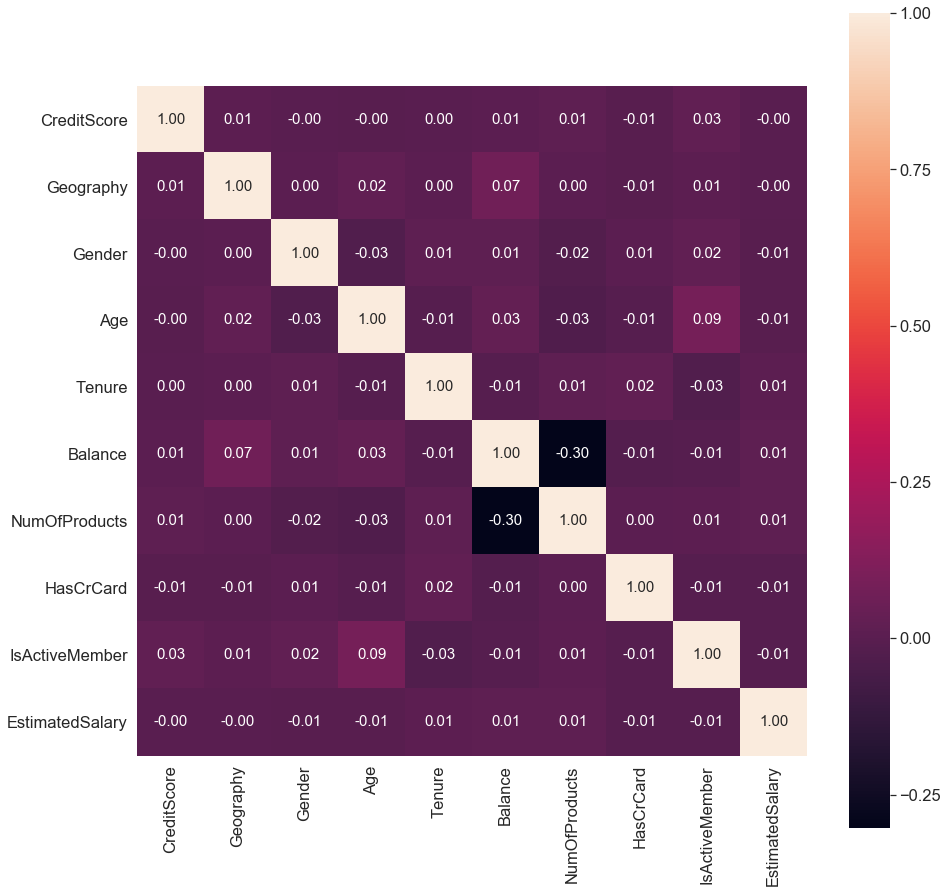

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
cols = data.columns
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 15}, yticklabels=cols, xticklabels=cols)
plt.show()

It can be seen that the strength of collinearity is indeed very weak with the highest being 0.3 (Balance and NumOfProducts)

### Checking for Class Imbalance

In [20]:
## let's count the number of customers who have churned as well as those who haven't
data = pd.read_csv('Churn_Modelling.csv')
exited = np.array(data['Exited'].values)
churned = np.sum(exited == 1).astype(int)
not_churned = np.sum(exited == 0).astype(int)
total = churned + not_churned
print('The percentage of customers that churned: %.3f%%' % (churned/total * 100))
print('The percentage of customers that did not churned: {}%'.format(not_churned/total * 100))
print('the total number of samples: %d' % int(total))

The percentage of customers that churned: 20.370%
The percentage of customers that did not churned: 79.63%
the total number of samples: 10000


There is a huge imbalance in the distribution of our class.

### Checking for Outliers

In [ ]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[(a > quartileSet[0]) & (a < quartileSet[1])]
    
    return result.tolist()